In [12]:
from keras.datasets import  mnist
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [15]:
(x_train, y_train), (x_test, y_test)  =  mnist.load_data()

In [16]:
print("Size fo X Train: ", x_train.shape)
print("Size fo Y Train: ", y_train.shape)
print("Size fo X Test: ", x_test.shape)
print("Size fo Y Test: ", y_test.shape)

Size fo X Train:  (60000, 28, 28)
Size fo Y Train:  (60000,)
Size fo X Test:  (10000, 28, 28)
Size fo Y Test:  (10000,)


Text(0.5, 1.0, 'Sample image')

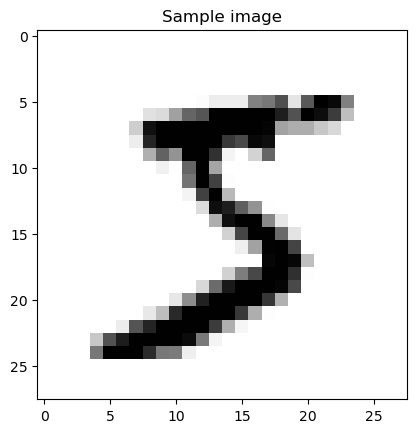

In [17]:
plt.imshow(x_train[0], cmap='binary')
plt.title("Sample image")

In [18]:
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [19]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [20]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.25))

model.add(Dense(10, activation="softmax"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dropout (Dropout)           (None, 800)               0

In [22]:
model.compile(optimizer="adam", loss = keras.losses.categorical_crossentropy, metrics="accuracy")

In [ ]:
his = model.fit(x_train, y_train, epochs=1, validation_split=0.3)
model.save("my_model.h5", save_format="h5")


1313/1313 [==============================] - 18s 13ms/step - loss: 0.2625 - accuracy: 0.9211 - val_loss: 0.0910 - val_accuracy: 0.9722


# Test the Model

1/1 [==============================] - 0s 20ms/step


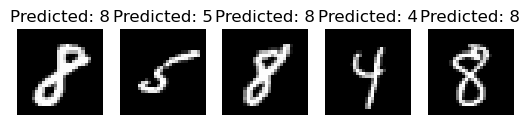

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
import random 



model = load_model("my_model.h5")

for i in range(5):
    image_index = random.randrange(10,50)  
    selected_image = x_train[image_index]
    true_label = np.argmax(y_test[image_index])

    predictions = model.predict(np.expand_dims(selected_image, axis=0))

    predicted_class = np.argmax(predictions)

    plt.subplot(1, 5, i + 1)
    plt.imshow(selected_image, cmap='gray')
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')

plt.show()


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Create a folder to save the smoothed images
output_folder = 'dataset'
os.makedirs(output_folder, exist_ok=True)

# Apply smoothing to the first 10 images
for i in range(10):
    image_index = i
    selected_image = x_test[image_index]

    # Apply Gaussian smoothing
    smoothed_image = cv2.GaussianBlur(selected_image, (5, 5), 0)

    # Save the smoothed image
    output_path = os.path.join(output_folder, f"smoothed_image_{i}.png")
    plt.imsave(output_path, smoothed_image, cmap='gray')
